In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\1234\Downloads\archive (4)\salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [5]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)

 <=50K    24698
 >50K      7839
Name: salary, dtype: int64


<AxesSubplot:xlabel='salary', ylabel='count'>

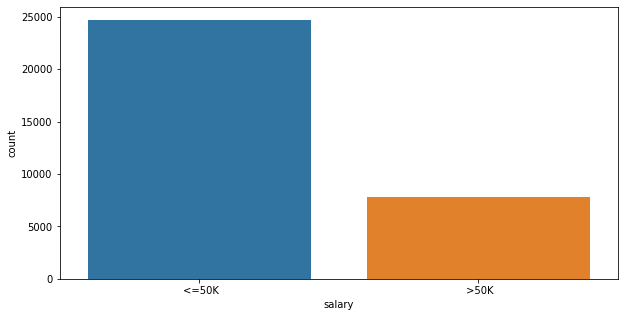

In [9]:
fig = plt.figure(figsize=(10,5))
print(df["salary"].value_counts())
sns.countplot(data = df, x="salary")

<AxesSubplot:xlabel='workclass', ylabel='count'>

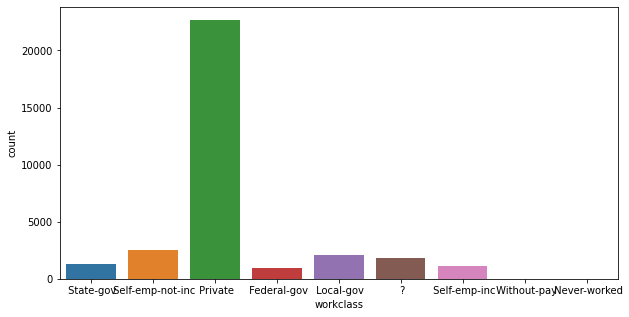

In [10]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = df, x="workclass")

<AxesSubplot:xlabel='workclass', ylabel='count'>

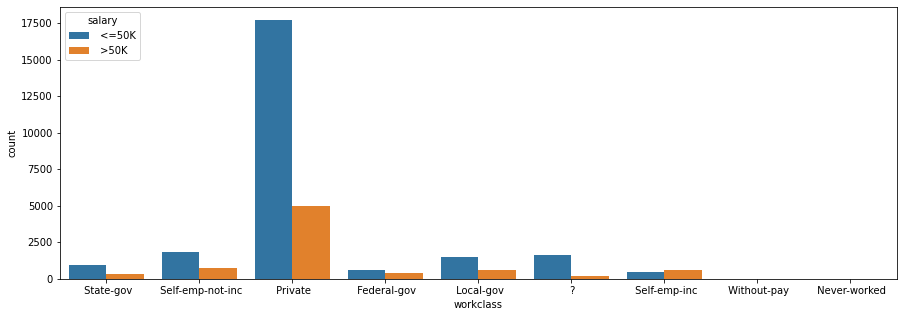

In [11]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data = df, x='workclass', hue="salary")

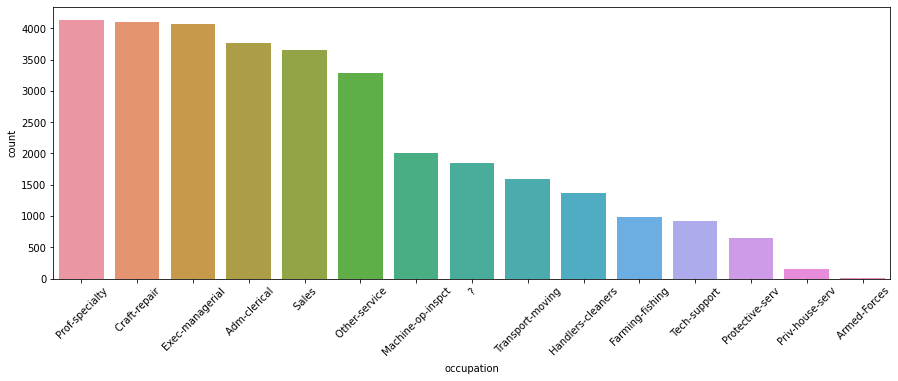

In [12]:
fig = plt.figure(figsize=(15,5))
g = sns.countplot(data = df, x='occupation', order=df["occupation"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.show()

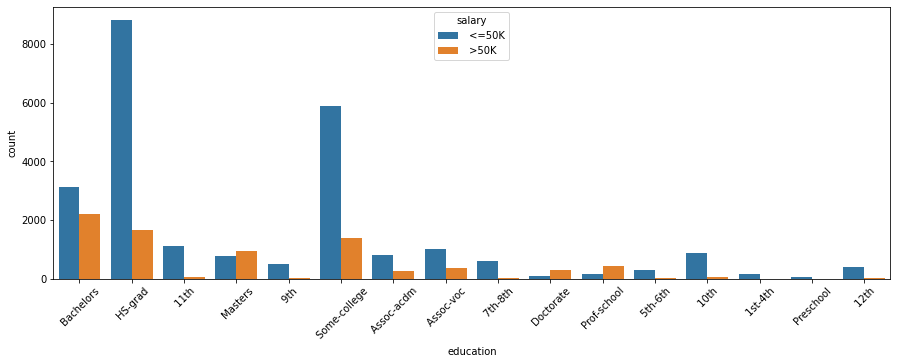

In [13]:
fig = plt.figure(figsize=(15,5))
g = sns.countplot(data = df, x='education', hue="salary")
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.show()

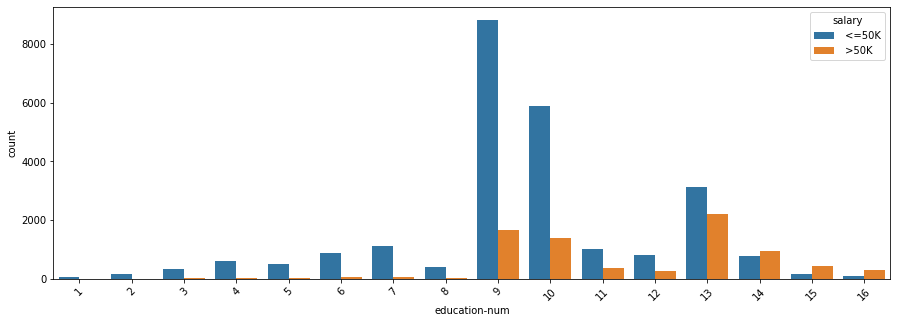

In [14]:
fig = plt.figure(figsize=(15,5))
g = sns.countplot(data = df, x='education-num', hue='salary')
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.show()

In [15]:
df.replace(" ?", np.nan, inplace=True)
df.fillna("other", inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
def label_encoding(col, df):
    df[col]= LabelEncoder().fit_transform(df[col])

In [18]:
def onehotencoding(col, df):
    temp = pd.get_dummies(data = df[col], drop_first=True, prefix=f"{col}_")
    df = pd.concat([df, temp], axis=1)
    df.drop(columns=[col], axis=1, inplace=True)
    return df

In [19]:
categorical_col = ["workclass","education","marital-status", "occupation", "relationship", "race", "native-country"]
binary_col = ["sex", "salary"]

In [20]:
for col in categorical_col:
    label_encoding(col, df)
    
for col in binary_col:
    df = onehotencoding(col, df)

In [21]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex__ Male,salary__ >50K
0,39,6,77516,9,13,4,0,1,4,2174,0,40,38,1,0
1,50,5,83311,9,13,2,3,0,4,0,0,13,38,1,0
2,38,3,215646,11,9,0,5,1,4,0,0,40,38,1,0
3,53,3,234721,1,7,2,5,0,2,0,0,40,38,1,0
4,28,3,338409,9,13,2,9,5,2,0,0,40,4,0,0


In [24]:
X = df.drop(['salary__ >50K'],axis = 1).values
y = df['salary__ >50K'].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve

In [27]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

C:\Users\1234\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


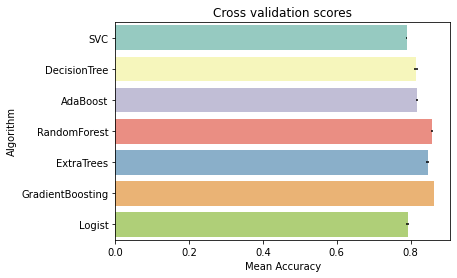

In [29]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,x_train, y_train, scoring = "accuracy", cv =5, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Logist"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [30]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.789726,0.001818,SVC
1,0.814007,0.005472,DecisionTree
2,0.818485,0.002976,AdaBoost
3,0.858529,0.002810,RandomForest
4,0.846367,0.004341,ExtraTrees
5,0.863359,0.000968,GradientBoosting
6,0.792843,0.004190,Logist
